# EDA

- Length of texts
- Cleaning train.csv

## Length of texts

In [4]:
import re
import pandas as pd
import glob

from tqdm.auto import tqdm

In [5]:
train_df = pd.read_csv('../feedback-prize-2021/train.csv')
train_df.loc[train_df.discourse_id==1623258656795.0, 'discourse_text'] =  train_df.loc[train_df.discourse_id==1623258656795.0, 
                                                                           'discourse_text'].map(lambda x: x.replace('florida', 'LOCATION_NAME')).values

texts = []
ids = []
for fname in tqdm(glob.glob('../feedback-prize-2021/train/*.txt')):
    with open(fname, encoding='utf-8') as f:
        texts.append(f.read())
    ids.append(fname.split('/')[-1].split('.')[0])

df = pd.DataFrame({'id': ids, 'text': texts})


df['text_len'] = df.text.apply(lambda x: len(re.split(r'\n| ', x)))


  0%|          | 0/15594 [00:00<?, ?it/s]

In [7]:
df.sort_values('text_len')

,id,text,text_len
14605,73D6F19E24BD,The students are very mad that the principal i...,151
15090,4CB458757785,The authors claim to keep studing venus is a v...,151
7903,5503B0FB1886,I dont think the use of the technology to read...,152
6631,C0897AC15921,The challenge of exploring venus was being abl...,152
15202,8CE968DB99AB,"Dear Principal,\n\nI am addressing the new pol...",152
...,...,...,...
2588,DC59B3A9D4A2,"Ther are 3 main supportive reassons why this ""...",7493
11071,803FA7997692,I dont think that FACS should be able to be us...,8546
7284,BFF07046CF7A,The author shows us the many benifical factors...,8815
4129,E4559E81E304,This passage is about a germany mom from the s...,8944


array([[<AxesSubplot:title={'center':'text_len'}>]], dtype=object)

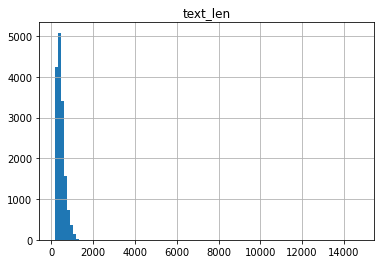

In [9]:
df.sort_values('text_len').hist(column='text_len', bins=100)

## Cleaning train.csv
> Just to share, I tried to use this file and the LB score improved by 0.002. This was on distilbert based small model only so there is a chance that this file can provide improved results on larger models.

- [corrected train.csv (feedback prize)](https://www.kaggle.com/nbroad/corrected-train-csv-feedback-prize)